# Portfolio Analysis and Optimization (Python + Excel)

Welcome to this portfolio analysis and optimization project! In this notebook, we’ll analyze a diversified portfolio consisting of various asset classes. Our journey will include:

- **Retrieving historical price data** for each asset,
- **Calculating daily log returns** to understand asset performance,
- **Visualizing cumulative returns** to identify trends over time,
- **Optimizing the portfolio allocation** based on return and risk metrics.

### Objective
Our main objective is to determine the optimal portfolio allocation and ultimately calculate the **Sharpe Ratio**. The Sharpe Ratio will help us assess the portfolio’s risk-adjusted return, providing a clear view of its performance.

In the final step, we’ll export our findings, including the Sharpe Ratio, to an Excel file for easy access and further analysis.

Let's dive in and start optimizing!


**Explanation:** Here, we import the essential libraries for our data analysis and portfolio optimization. This includes pandas for data handling and numpy for numerical operations.
- **yfinance**: A library that allows easy access to financial data from Yahoo Finance, making it convenient to download historical price data for stocks and other financial assets.
- **pandas**: A powerful data manipulation library in Python that provides data structures like DataFrames for handling large datasets with ease.
- **pandas_datareader**: A library that retrieves data from various online sources, including Yahoo Finance, though `yfinance` is primarily used here.
- **datetime**: A Python module for manipulating dates and times, essential for setting up date ranges for data retrieval.
- **numpy**: A library that provides support for large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to operate on these arrays.
- **os**: A module that provides a way of using operating system-dependent functionality, such as file and directory management.

In [75]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np
import os

**In this step, we set up the date range for our analysis. Specifically, we calculate today’s date and a date 5 years ago to serve as our start date for data retrieval.**

In [76]:
import datetime as dt

endDate = dt.datetime.now().date()  
startDate = (dt.datetime.now() - dt.timedelta(days=365*5)).date()  

endDate, startDate


(datetime.date(2024, 11, 7), datetime.date(2019, 11, 9))

**Here, we define a list of stock tickers that will make up our portfolio. These represent a mix of asset classes to diversify the portfolio.**

### Tickers in the Portfolio

Below is a list of the asset tickers included in our portfolio, along with their descriptions to provide context on each asset's market sector and characteristics.

- **TLH**: iShares 10-20 Year Treasury Bond ETF  
  A U.S. Treasury bond exchange-traded fund (ETF) that invests in government bonds with maturities between 10 and 20 years, providing stable returns with lower risk compared to equities.

- **SPY**: SPDR S&P 500 ETF Trust  
  This ETF tracks the performance of the S&P 500 index, representing the largest 500 publicly traded companies in the U.S. It offers broad exposure to the U.S. equity market.

- **LQD**: iShares iBoxx $ Investment Grade Corporate Bond ETF  
  An ETF that invests in U.S. investment-grade corporate bonds, providing exposure to high-quality bonds issued by corporations, which generally offer higher returns than government bonds.

- **VNQ**: Vanguard Real Estate ETF  
  An ETF focused on U.S. real estate investment trusts (REITs), giving investors exposure to real estate assets through companies involved in the ownership, operation, or financing of real estate.

- **XLV**: Health Care Select Sector SPDR Fund  
  This ETF tracks companies in the healthcare sector, including pharmaceutical, healthcare services, and medical device companies, offering exposure to one of the largest sectors in the U.S. economy.

- **GOLD**: SPDR Gold Shares  
  A commodity ETF that aims to mirror the performance of the price of gold bullion. It's commonly used as a hedge against inflation and economic instability.

- **DBC**: Invesco DB Commodity Index Tracking Fund  
  An ETF providing exposure to a broad range of commodities, including energy, precious metals, and agricultural products, allowing investors to diversify into the commodity market.

- **EQT**: EQT Corporation  
  A leading natural gas production company in the U.S., EQT Corporation focuses on the development and exploration of natural gas and natural gas liquids, especially in the Appalachian Basin.

- **QQQ**: Invesco QQQ Trust  
  This ETF tracks the Nasdaq-100 Index, comprising 100 of the largest non-financial companies listed on the Nasdaq stock exchange, making it heavily weighted in technology.

- **BTC-USD**: Bitcoin  
  The digital currency Bitcoin, representing exposure to the cryptocurrency market. Bitcoin is often viewed as a store of value and an alternative asset for portfolio diversification.


In [77]:
stocks = ['TLH', 'SPY', "LQD", 'VNQ', 'XLV', 'GOLD', 'DBC', 'EQT', 'QQQ', 'BTC-USD']

**Next, we use Yahoo Finance to download historical price data for our chosen tickers over the specified date range.**

In [78]:
df = yf.download(stocks, start = startDate, end =  endDate)
df.index = df.index.date

[*********************100%***********************]  10 of 10 completed


**Let’s take a look at the first few rows of our dataset to get a quick understanding of its structure and contents.**

**We extract the adjusted closing prices from our dataset, which are crucial for accurately calculating returns.**

In [79]:
df.head(5)

Price         Adj Close                                              \
Ticker          BTC-USD        DBC       EQT       GOLD         LQD   
2019-11-09  8813.582031        NaN       NaN        NaN         NaN   
2019-11-10  9055.526367        NaN       NaN        NaN         NaN   
2019-11-11  8757.788086  14.463119  9.962588  14.355486  106.996437   
2019-11-12  8815.662109  14.472445  9.877517  14.408071  107.098564   
2019-11-13  8808.262695  14.500420  9.820807  14.600883  107.353813   

Price                                                                 ...  \
Ticker             QQQ         SPY         TLH        VNQ        XLV  ...   
2019-11-09         NaN         NaN         NaN        NaN        NaN  ...   
2019-11-10         NaN         NaN         NaN        NaN        NaN  ...   
2019-11-11  194.788635  285.437653  125.120255  75.535080  86.958900  ...   
2019-11-12  195.350815  286.039307  125.407318  74.964157  87.482079  ...   
2019-11-13  195.399277  286.131897  125.876907  75.650909  87.583031  ...   

Price             Volume                                                \
Ticker           BTC-USD        DBC        EQT        GOLD         LQD   
2019-11-09  1.757863e+10        NaN        NaN         NaN         NaN   
2019-11-10  2.058792e+10        NaN        NaN         NaN         NaN   
2019-11-11  2.026551e+10   612600.0  6036000.0   9757300.0   3231600.0   
2019-11-12  2.030977e+10   450300.0  3571000.0  11934900.0   9936600.0   
2019-11-13  1.754576e+10  5073800.0  3198200.0  12264100.0  10280100.0   

Price                                                                 
Ticker             QQQ         SPY        TLH        VNQ         XLV  
2019-11-09         NaN         NaN        NaN        NaN         NaN  
2019-11-10         NaN         NaN        NaN        NaN         NaN  
2019-11-11  10147600.0  35797300.0    37900.0  3525200.0   6092500.0  
2019-11-12  14778300.0  46484600.0  1247900.0  5701600.0  13801500.0  
2019-11-13  15774600.0  53917700.0   104500.0  4316000.0   6507700.0  

[5 rows x 60 columns]

In [80]:
adj_close_prices = df['Adj Close']
print (adj_close_prices)

Ticker           BTC-USD        DBC        EQT       GOLD         LQD  \
2019-11-09   8813.582031        NaN        NaN        NaN         NaN   
2019-11-10   9055.526367        NaN        NaN        NaN         NaN   
2019-11-11   8757.788086  14.463119   9.962588  14.355486  106.996437   
2019-11-12   8815.662109  14.472445   9.877517  14.408071  107.098564   
2019-11-13   8808.262695  14.500420   9.820807  14.600883  107.353813   
...                  ...        ...        ...        ...         ...   
2024-11-02  69289.273438        NaN        NaN        NaN         NaN   
2024-11-03  68741.117188        NaN        NaN        NaN         NaN   
2024-11-04  67811.507812  22.730000  36.645115  18.900000  108.809998   
2024-11-05  69359.562500  22.870001  37.382000  18.879999  109.330002   
2024-11-06           NaN  22.620001  40.209999  18.430000  108.190002   

Ticker             QQQ         SPY         TLH        VNQ         XLV  
2019-11-09         NaN         NaN         NaN     

**Here, we calculate the log returns based on the adjusted closing prices. Log returns are commonly used in finance for their statistical properties.**

In [81]:
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
print(log_returns)

Ticker       BTC-USD       DBC       EQT      GOLD       LQD       QQQ  \
2019-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2019-11-10  0.027081       NaN       NaN       NaN       NaN       NaN   
2019-11-11 -0.033432       NaN       NaN       NaN       NaN       NaN   
2019-11-12  0.006587  0.000645 -0.008576  0.003656  0.000954  0.002882   
2019-11-13 -0.000840  0.001931 -0.005758  0.013294  0.002380  0.000248   
...              ...       ...       ...       ...       ...       ...   
2024-11-02 -0.002784       NaN       NaN       NaN       NaN       NaN   
2024-11-03 -0.007943       NaN       NaN       NaN       NaN       NaN   
2024-11-04 -0.013616       NaN       NaN       NaN       NaN       NaN   
2024-11-05  0.022572  0.006140  0.019909 -0.001059  0.004768  0.012676   
2024-11-06       NaN -0.010992  0.072926 -0.024123 -0.010482  0.026801   

Ticker           SPY       TLH       VNQ       XLV  
2019-11-09       NaN       NaN       NaN       NaN  
2019-

**Now, we compute the cumulative log returns over time, which will help us visualize the overall growth or decline of each asset.**

In [82]:
cumulative_lg_returns = log_returns.cumsum()
print(cumulative_lg_returns)

Ticker       BTC-USD       DBC       EQT      GOLD       LQD       QQQ  \
2019-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2019-11-10  0.027081       NaN       NaN       NaN       NaN       NaN   
2019-11-11 -0.006351       NaN       NaN       NaN       NaN       NaN   
2019-11-12  0.000236  0.000645 -0.008576  0.003656  0.000954  0.002882   
2019-11-13 -0.000604  0.002576 -0.014334  0.016950  0.003335  0.003130   
...              ...       ...       ...       ...       ...       ...   
2024-11-02  2.061996       NaN       NaN       NaN       NaN       NaN   
2024-11-03  2.054054       NaN       NaN       NaN       NaN       NaN   
2024-11-04  2.040438       NaN       NaN       NaN       NaN       NaN   
2024-11-05  2.063010  0.538834  1.079176 -0.086231  0.316069  0.690143   
2024-11-06       NaN  0.527843  1.152102 -0.110355  0.305587  0.716944   

Ticker           SPY       TLH       VNQ       XLV  
2019-11-09       NaN       NaN       NaN       NaN  
2019-

**Let’s create a plot to visualize the cumulative returns of each asset. This gives us a clear view of their performance trends over the selected period.**

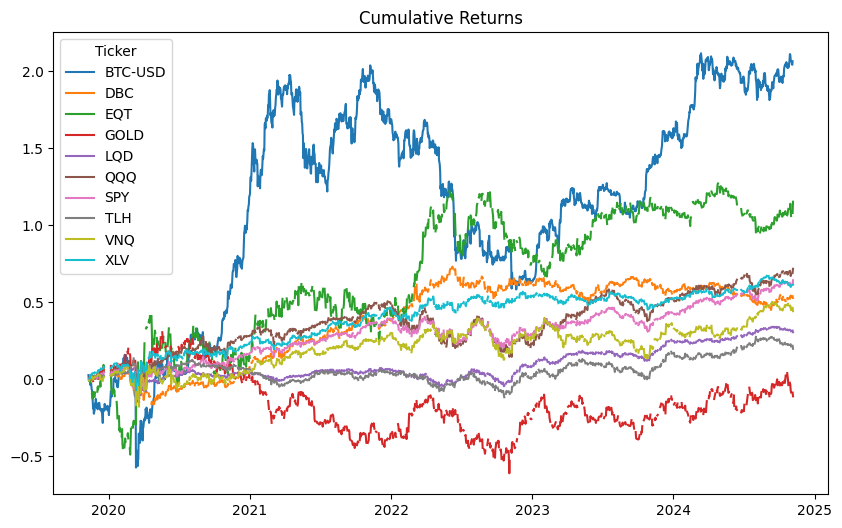

In [83]:
cumulative_lg_returns.plot(title = 'Cumulative Returns', figsize = (10, 6))
None

**We redefine our list of tickers here, which we’ll use in the upcoming steps for specific calculations.**

In [84]:
tickers = ['TLH', 'SPY', "LQD", 'VNQ', 'XLV', 'GOLD', 'DBC', 'EQT', 'QQQ', 'BTC-USD']


**Here, we redefine the date range, focusing on the last two years of data for this part of the analysis.**

In [85]:
end_date = dt.datetime.today().date()
print(end_date)
start_date = (end_date - dt.timedelta(days = 2*365))
print(start_date)
            

2024-11-07
2022-11-08


**In this cell, we set up an empty DataFrame to store the closing prices for further analysis.**

In [86]:
close_df = pd.DataFrame()



**Now we go through each ticker to download the closing prices for our date range. This data will be stored in our DataFrame for further analysis.**

In [87]:
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end= end_date)
    data.index = data.index.date
    close_df[ticker] = data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**We specify the folder path here for saving our analysis results.**

In [69]:
output_folder = r"C:\Users\qwerty\Desktop\Python\JNotebook\start"

**Finally, we export our close price data to an Excel file. This makes it easy to access and share our results.**

In [70]:
output_folder = os.path.join(output_folder, 'optimal_portfolio.xlsx')
close_df.to_excel(output_folder)

**The next step is to analyze the assets and calculate the Sharpe ratio in 'optimal_portfolio.xlsx'. Additionally, refer to the README for all necessary instructions.**